# Student Performance Indicator

## Life Cycle of a Machine Learning Project
- Understanding the problem statement
- Data Collection
- Data Check to perform
- Exploratory Data Analysis
- Data Preprocessing
- Model Training
- Choose best model

## 1) Problem Statement 

- The project understands how the student performance (test Scores) is affected by the other variables such as gender ,ethinicity ,parental level of education,lunch and test preparation course.

## 2) Data Collection 
- Data Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
- The Data Consists of 8 columns and 1000 rows

## 2.1 Import Data And Required Packages
- like pandas numpy matplotlib seaborn and warnings library



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

## Import the csv data as python data frame

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()  ## it will show the top 5 records

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## 3) Data Checks to perform
- check missing values
- check duplicated
- check data types
- check the number of unique values of each column
- check statistics of dataset
- check various categories present in the different catagorical column

In [5]:
## check missing values 
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

* There is no missing values

In [7]:
## checking for the dublicates
df.duplicated().sum()

0

- there is no duplicates

In [8]:
## checking the data types now 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
## checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
## check statistics of data

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
## 3.7 Exploring Data

In [14]:
print("Categories in gender variable : " ,end=" ")
print(df['gender'].unique())

print("Categoris in race/ethinicity variable: ",end=" ")
print(df['race_ethnicity'].unique())

print("Categoris in 'parental level of education' variable: ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categoris in 'lunch' variable: ",end=" ")
print(df['lunch'].unique())

print("Categoris in 'test_preparation_course' variable: ",end=" ")
print(df['test_preparation_course'].unique())

Categories in gender variable :  ['female' 'male']
Categoris in race/ethinicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categoris in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categoris in 'lunch' variable:  ['standard' 'free/reduced']
Categoris in 'test_preparation_course' variable:  ['none' 'completed']


## now we define numerical and categorical columns 

In [15]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

## print columns 
print(f"we have {len(numeric_features)} numerical features : {numeric_features}")
print(f"we have {len(categorical_features)} categorical features : {categorical_features}")

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## we will add columns for total score and average

In [16]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f"Number of Students with full marks in maths : {math_full}")
print(f"Number of Students with full marks in reading : {reading_full}")
print(f"Number of Students with full marks in writing : {writing_full}")

Number of Students with full marks in maths : 7
Number of Students with full marks in reading : 17
Number of Students with full marks in writing : 14


In [18]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f"Number of Students with less than 20 marks in maths : {math_less_20}")
print(f"Number of Students with less than 20 marks in reading : {reading_less_20}")
print(f"Number of Students with less than 20 marks in writing : {writing_less_20}")

Number of Students with less than 20 marks in maths : 4
Number of Students with less than 20 marks in reading : 1
Number of Students with less than 20 marks in writing : 3


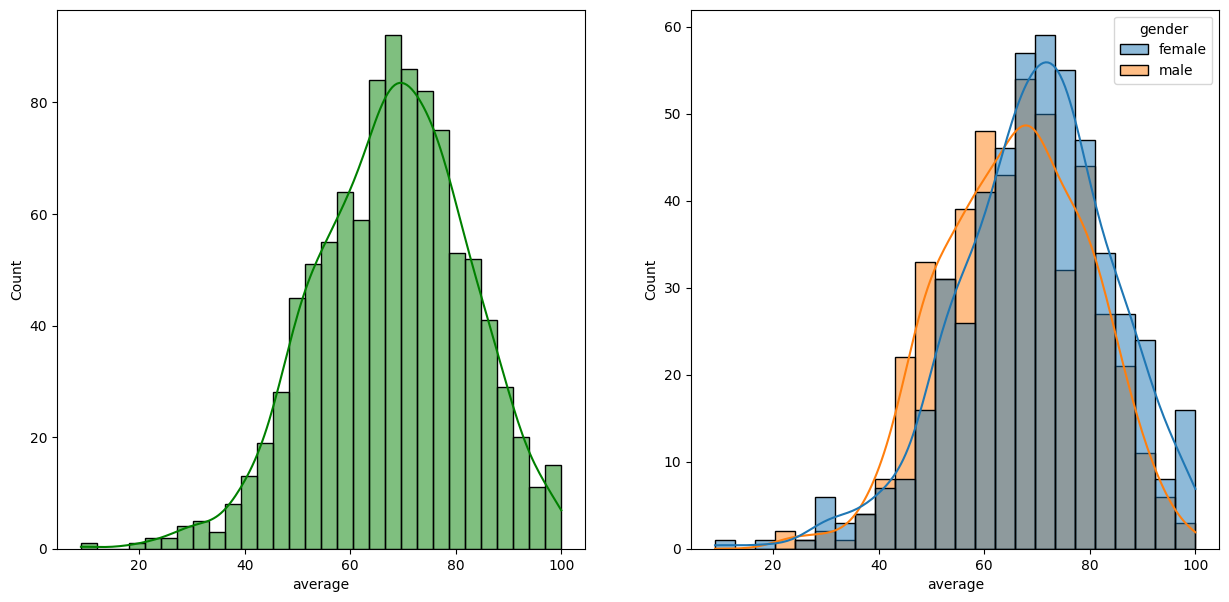

In [19]:
fig , axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

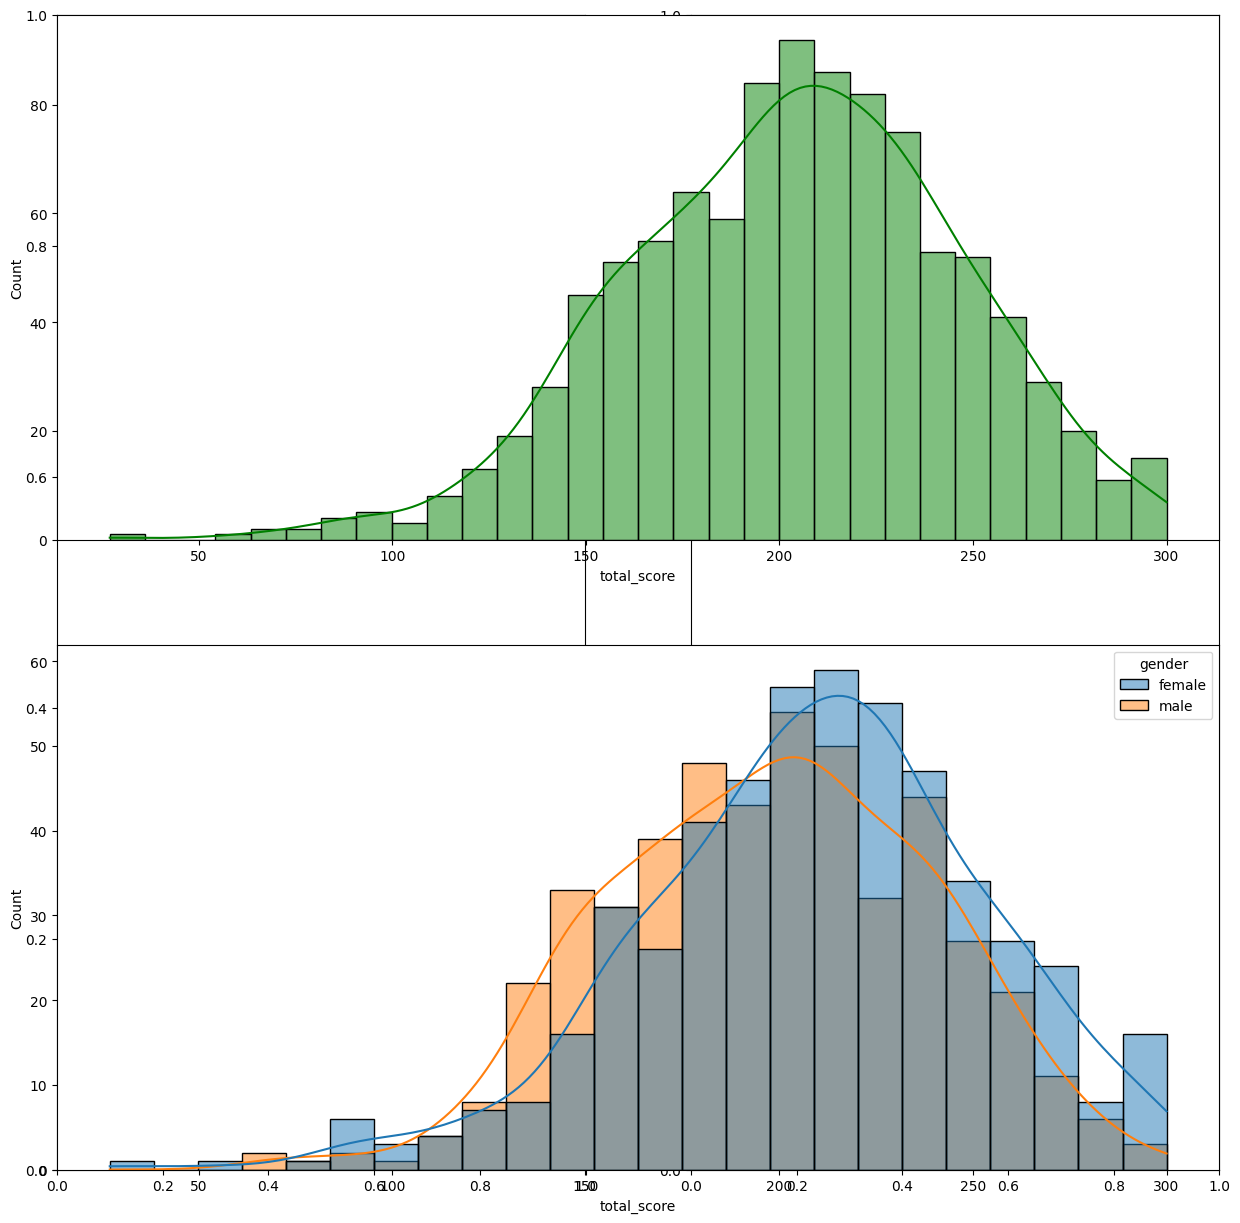

In [20]:
fig , axs = plt.subplots(1,2,figsize=(15,15))
plt.subplot(2,1,1)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(2,1,2)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

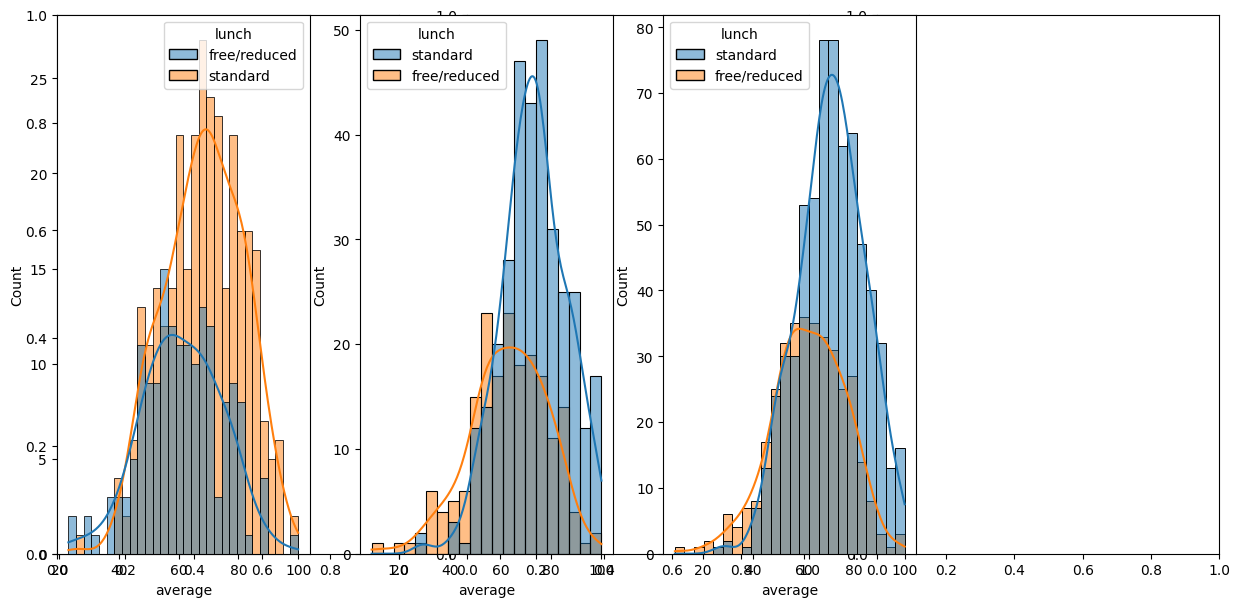

In [21]:
fig , axs = plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,color='g',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.show()

### Insights
- Standard Lunch helps in performing well in exam
- Standard Lunch helps in performing well in exam wether it's male or female.

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


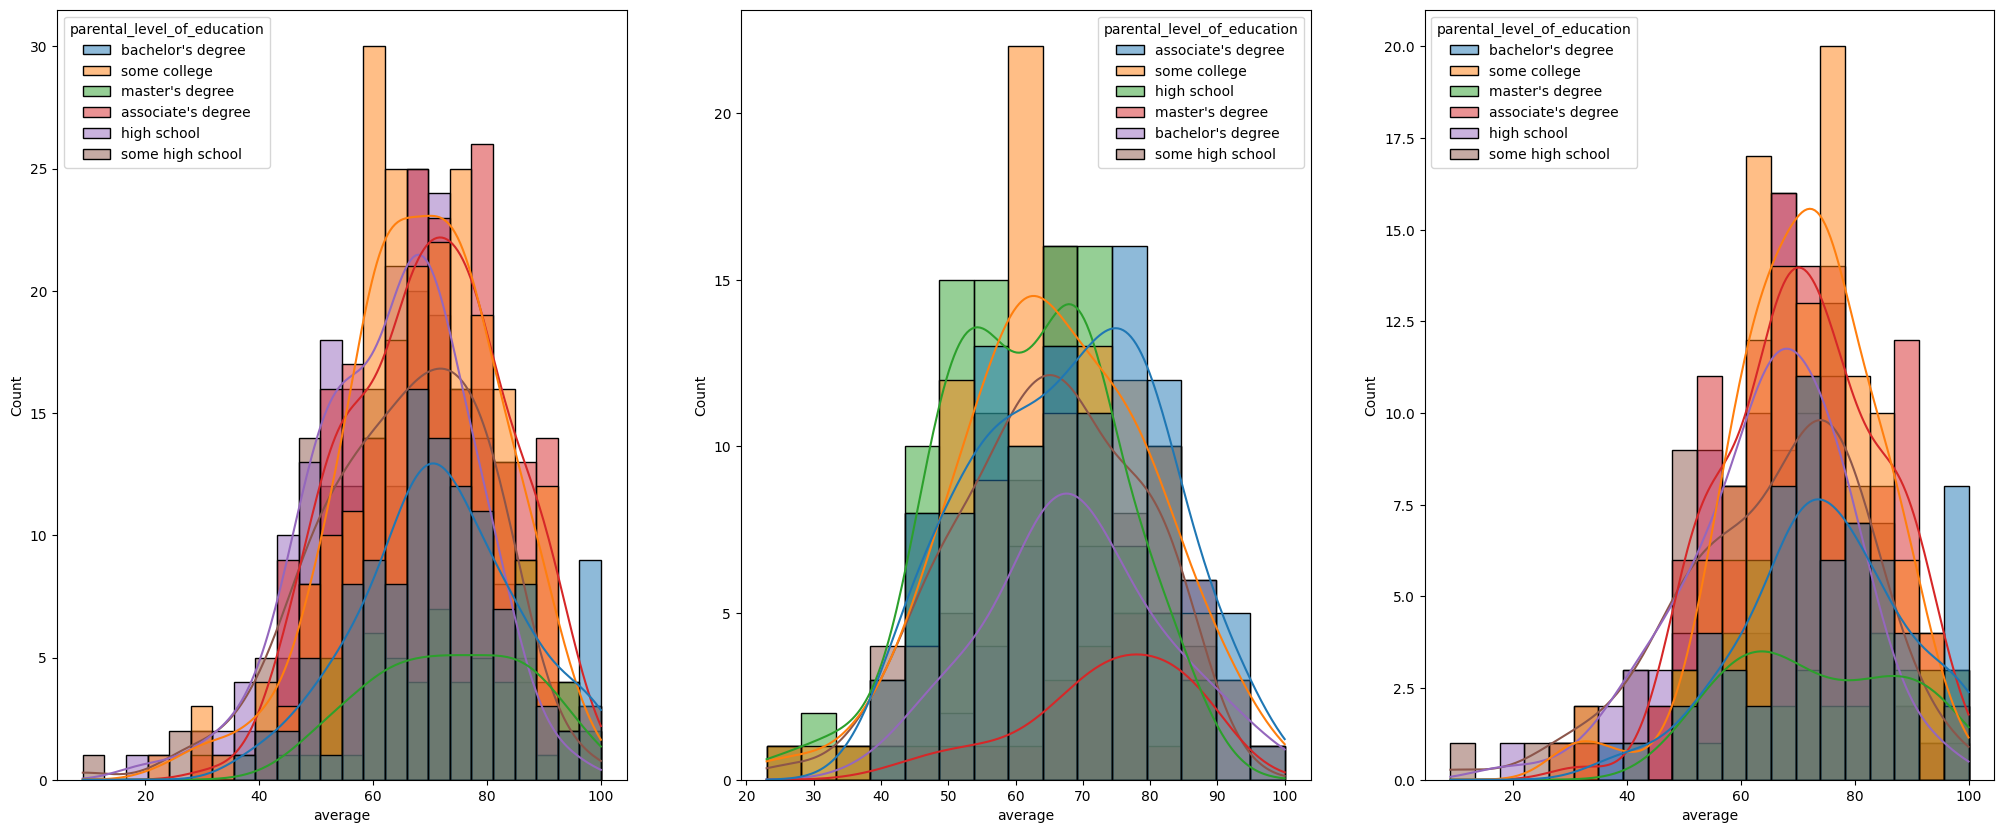

In [23]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax = sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

#### Insights

- In general parents education is not helping the students to perform well in exam
- 2nd plot shows that the parents with associate degree or master's degree their male child tend to perform well in exam
- 3rd plot we can say that there's no effect of parents education on female child 

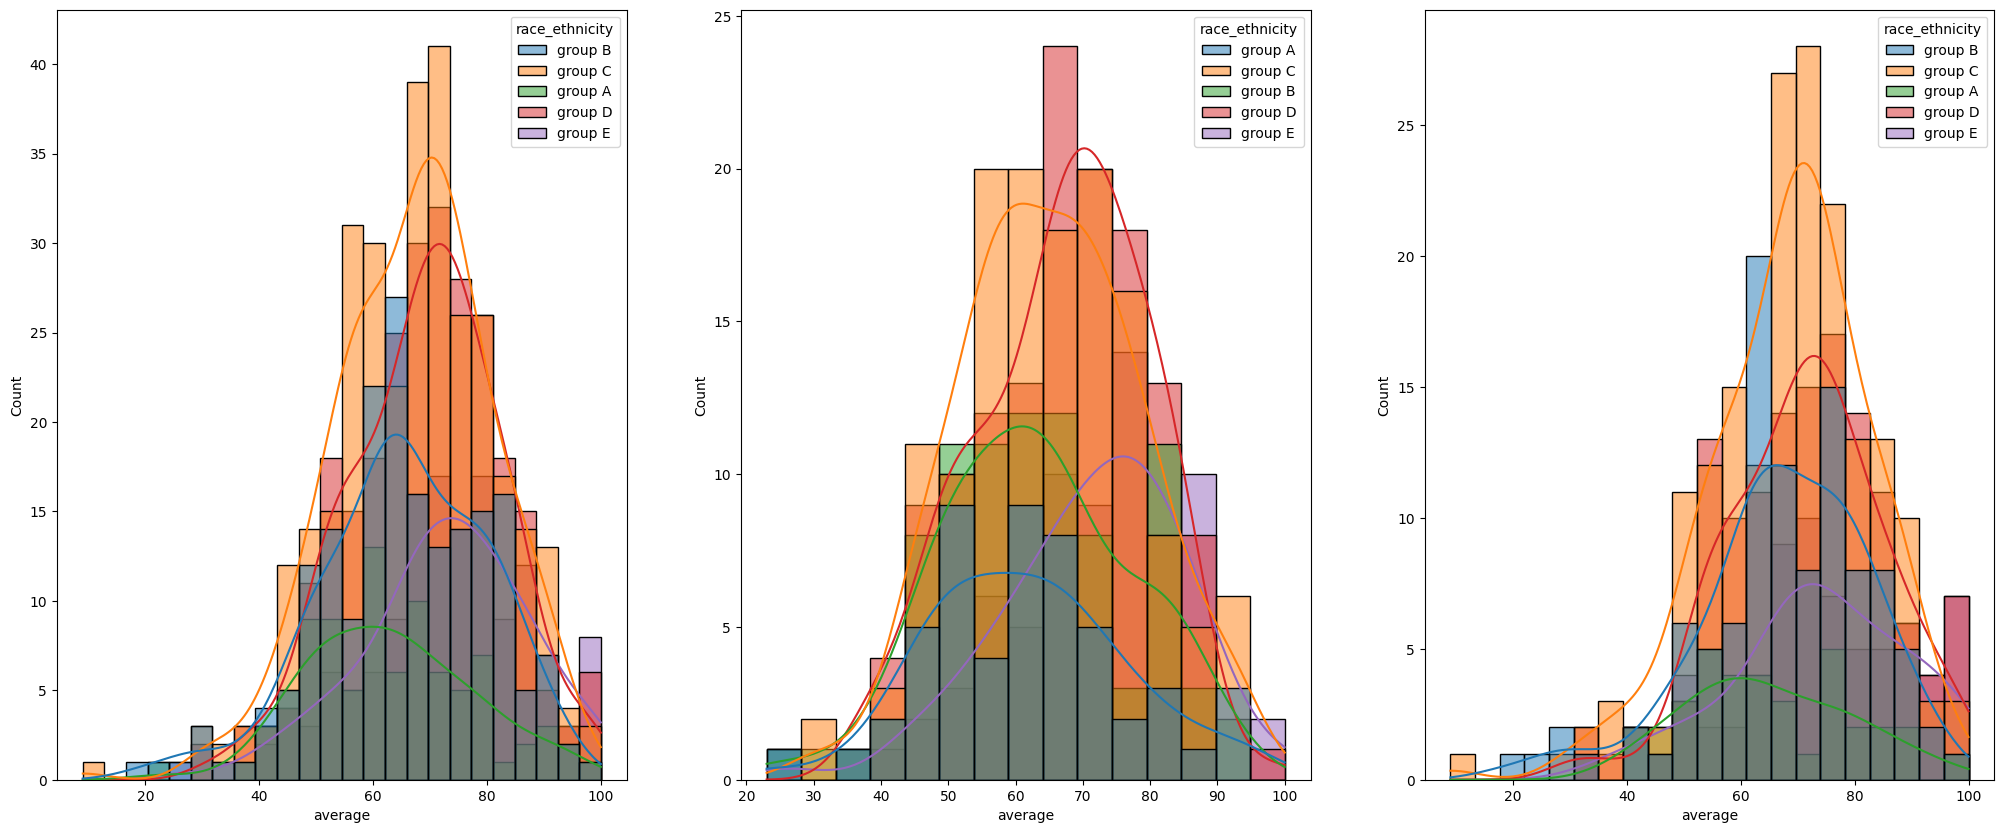

In [24]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax = sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### Insights 
- Students of group A and B tends to perform poorly in exam
- Students of group A and group B tends ot perform poorly in exam irrespective of gender 

### 4.2 Maximum Score of students in all 3 subjects

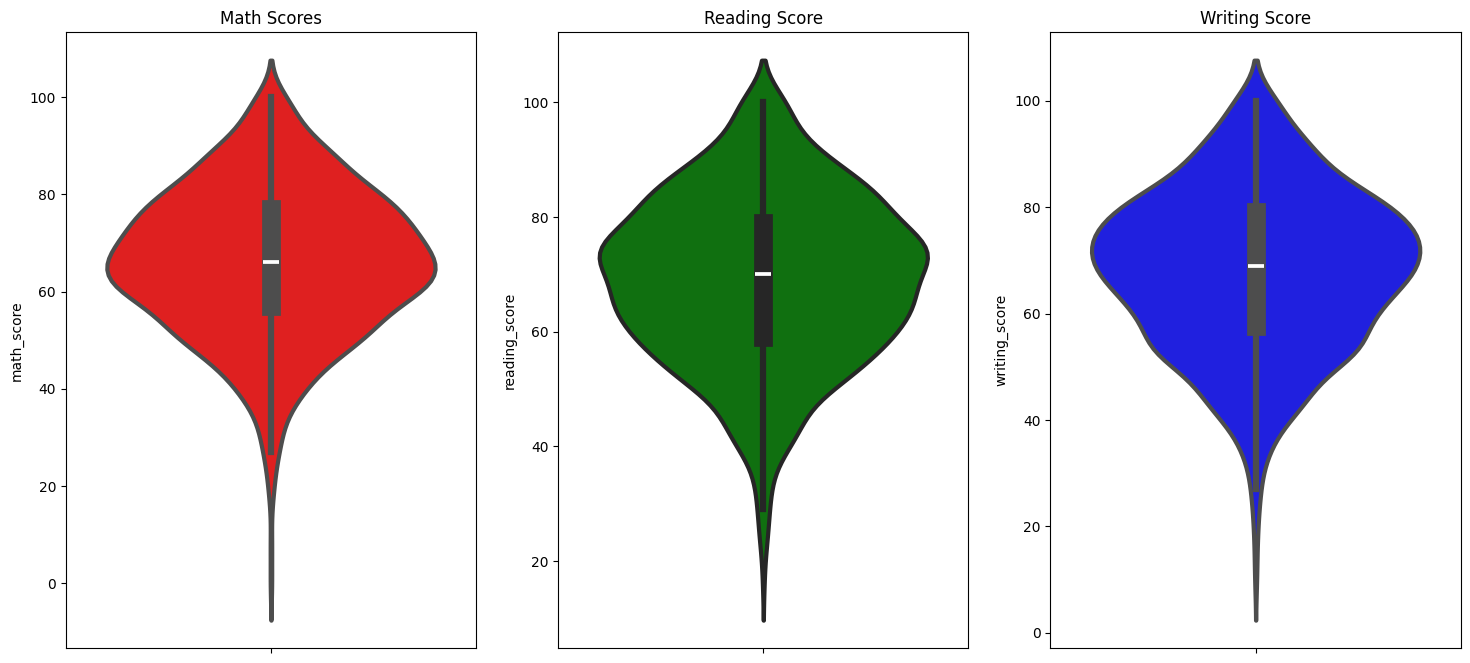

In [25]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('Math Scores')
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('Reading Score')
sns.violinplot(data=df,y='reading_score',color='green',linewidth=3)
plt.subplot(1,3,3)
plt.title('Writing Score')
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3)
plt.show()

## 4.3 multicariate analysis using pieplot

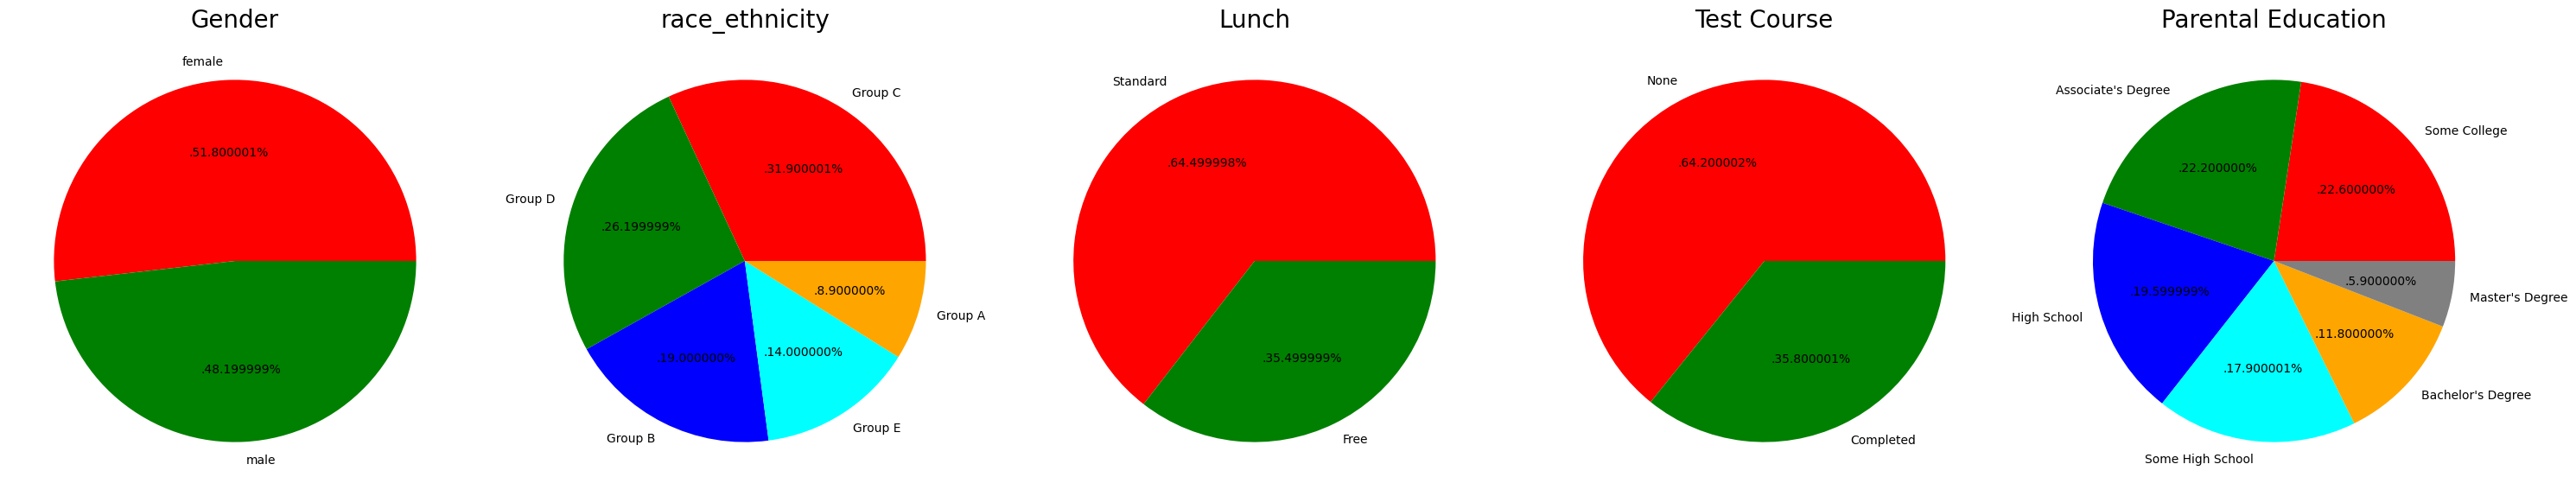

In [26]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'female' , 'male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race_ethnicity',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

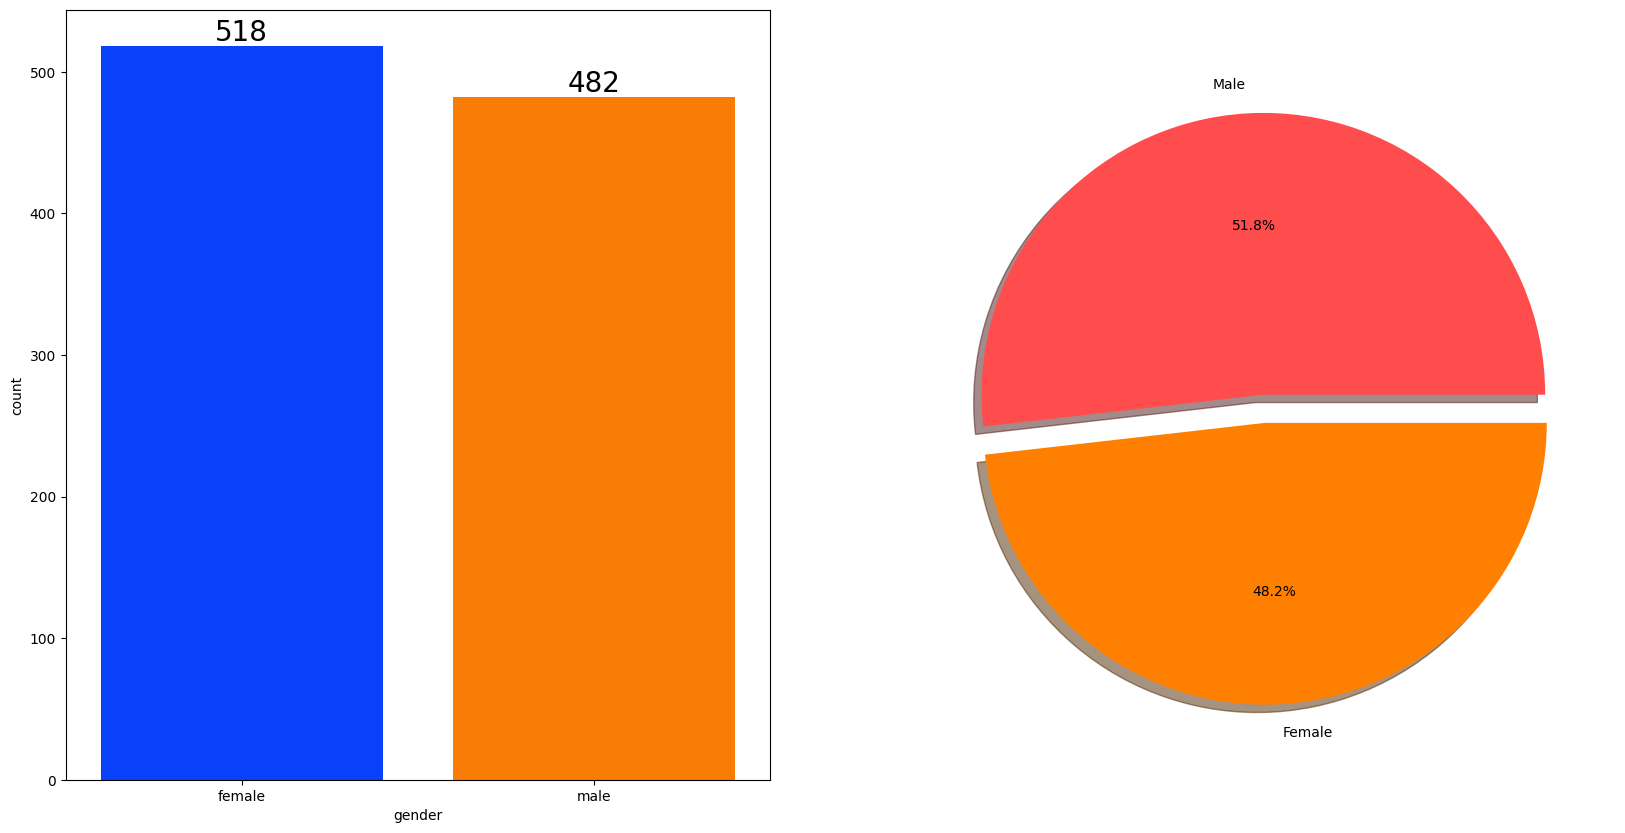

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [28]:
df[df.gender=='female']['average'].count()

518

In [29]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
numeric_features

['math_score', 'reading_score', 'writing_score', 'total_score', 'average']

In [30]:

gender_group = df.groupby('gender')[numeric_features].mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


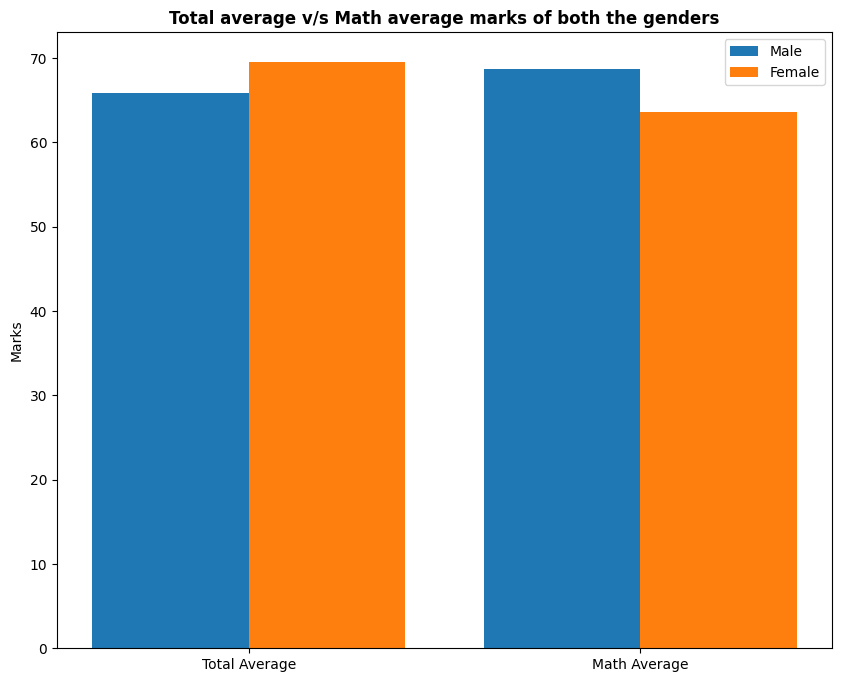

In [31]:
plt.figure(figsize=(10,8))
X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

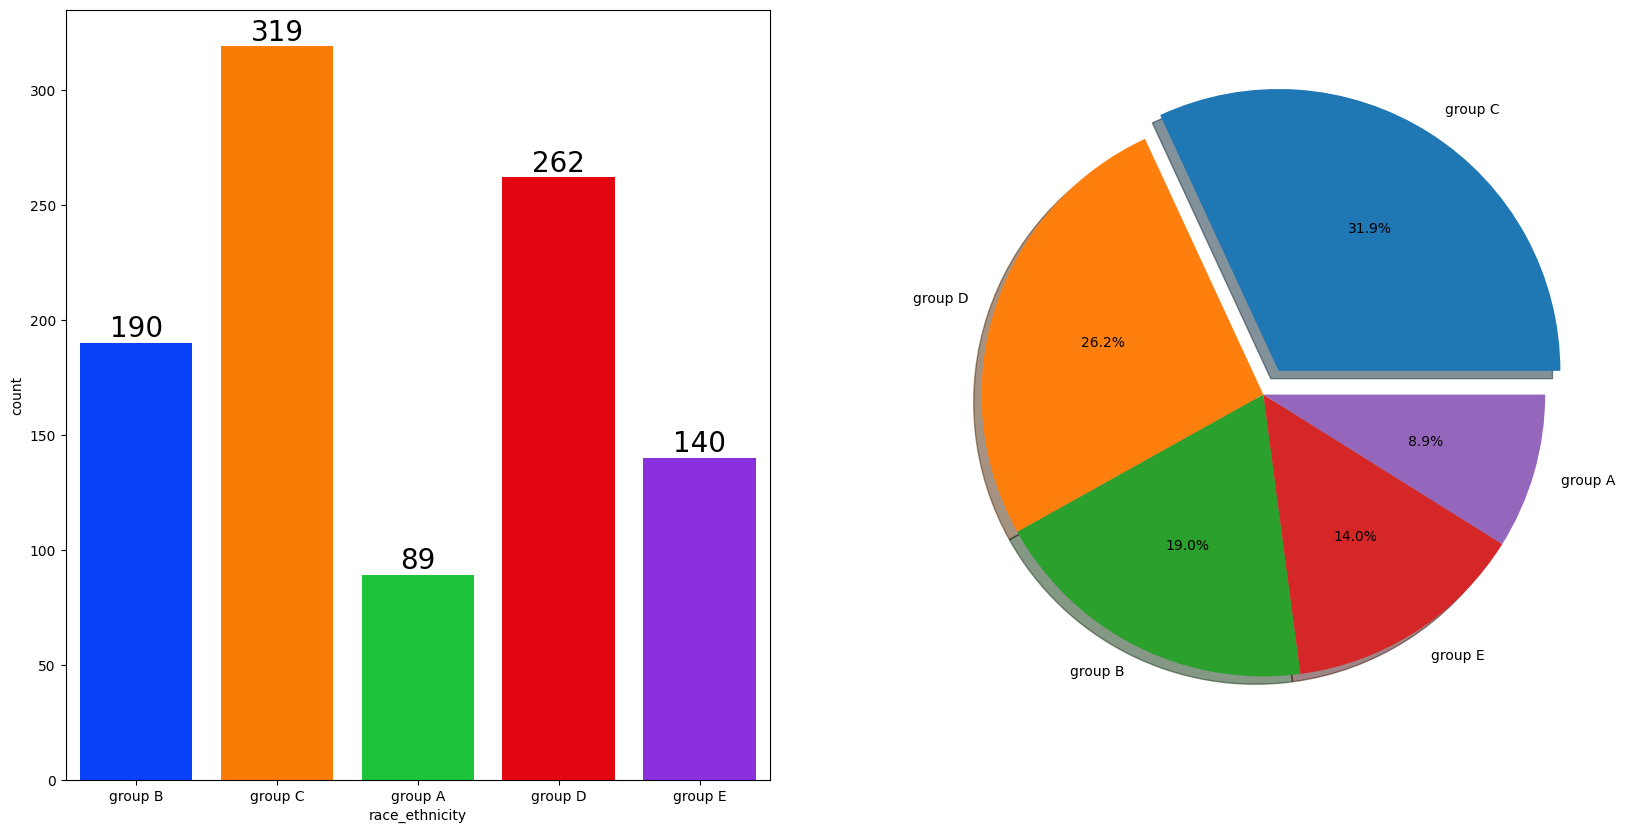

In [32]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

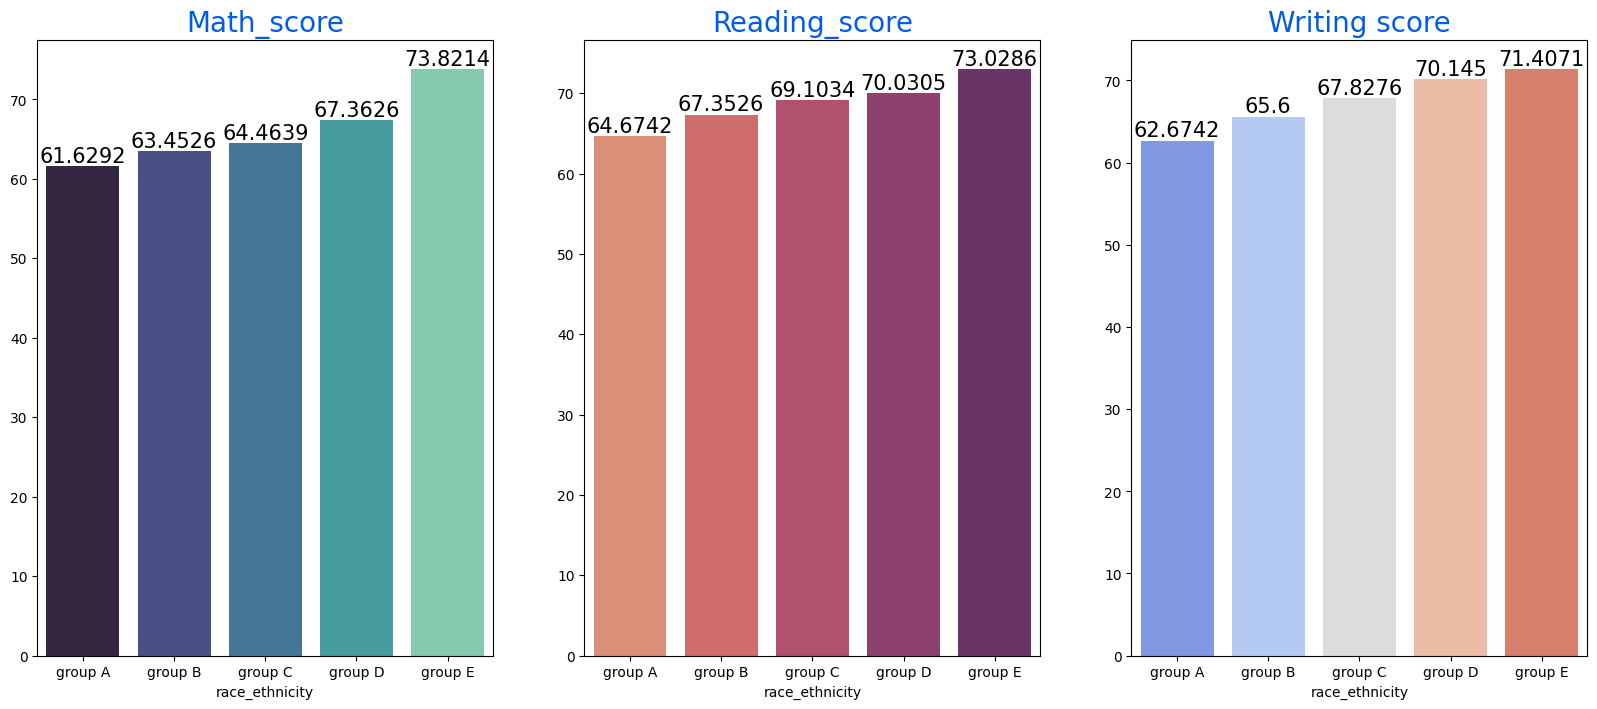

In [33]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

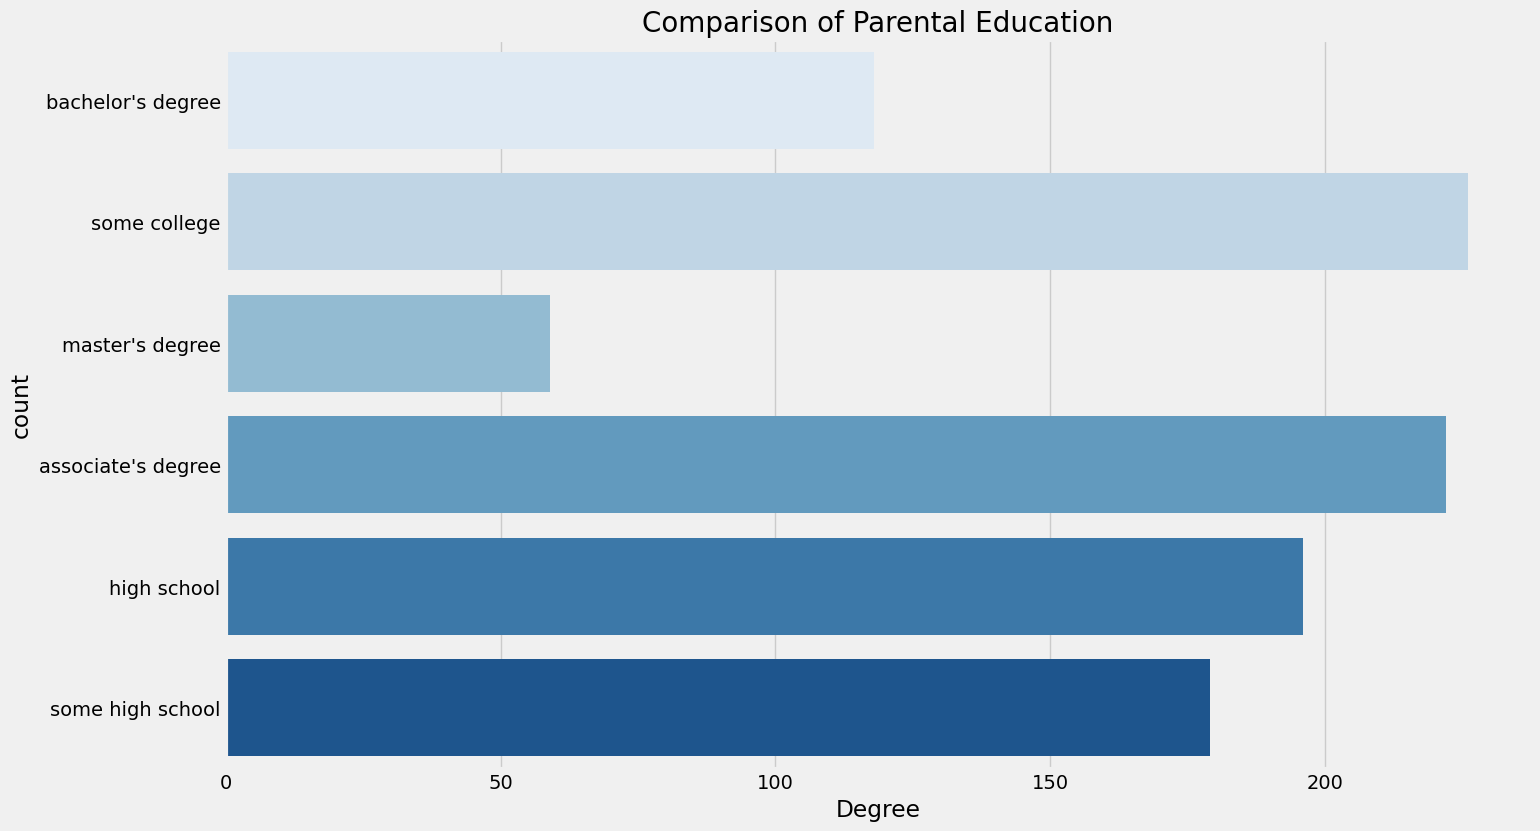

In [34]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

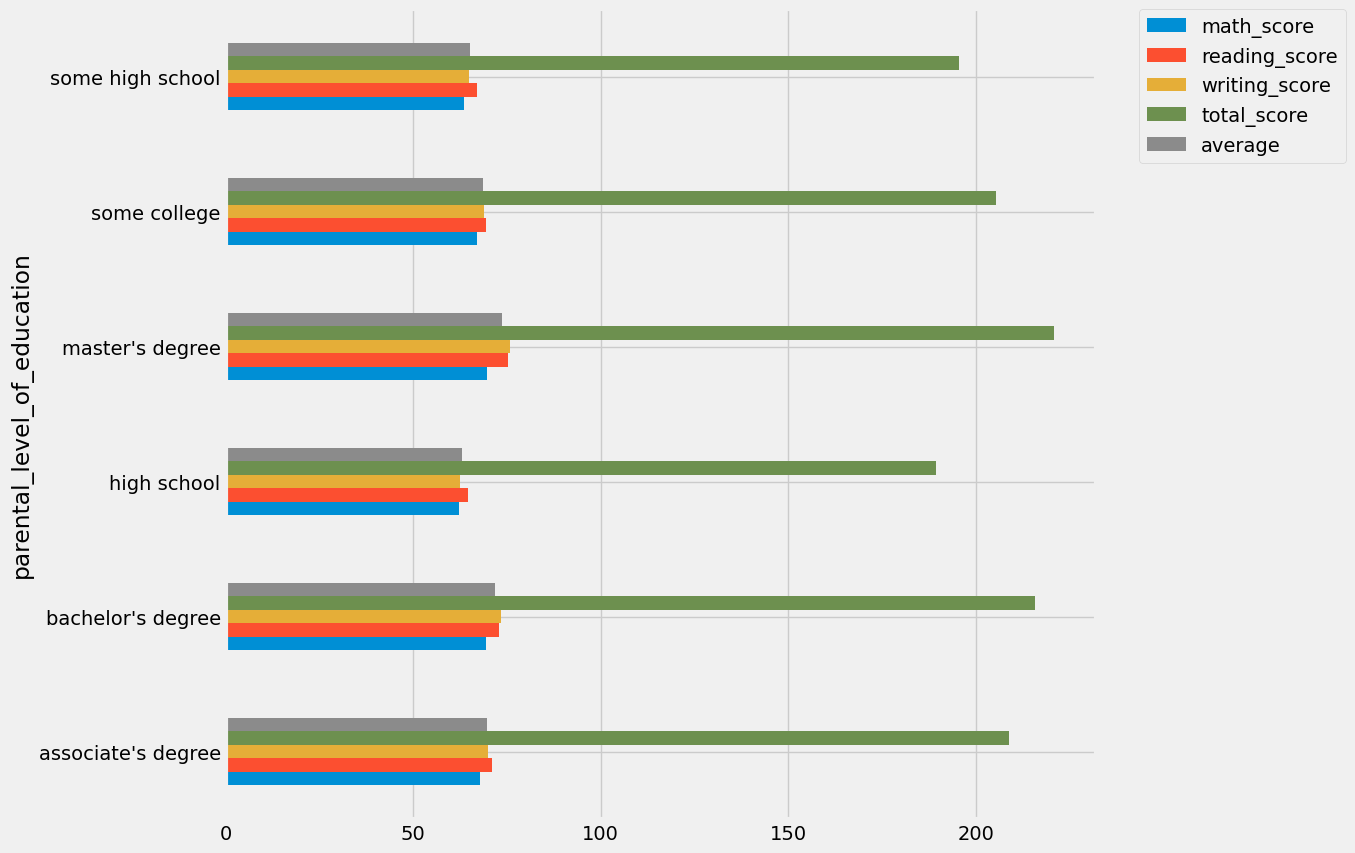

In [35]:
df.groupby('parental_level_of_education')[numeric_features].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [36]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

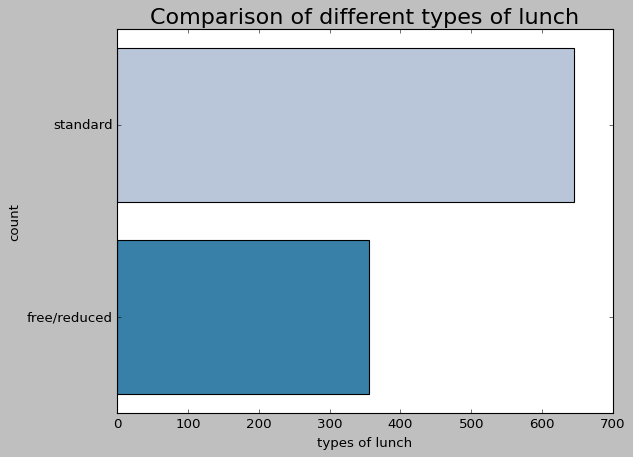

In [37]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('classic')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

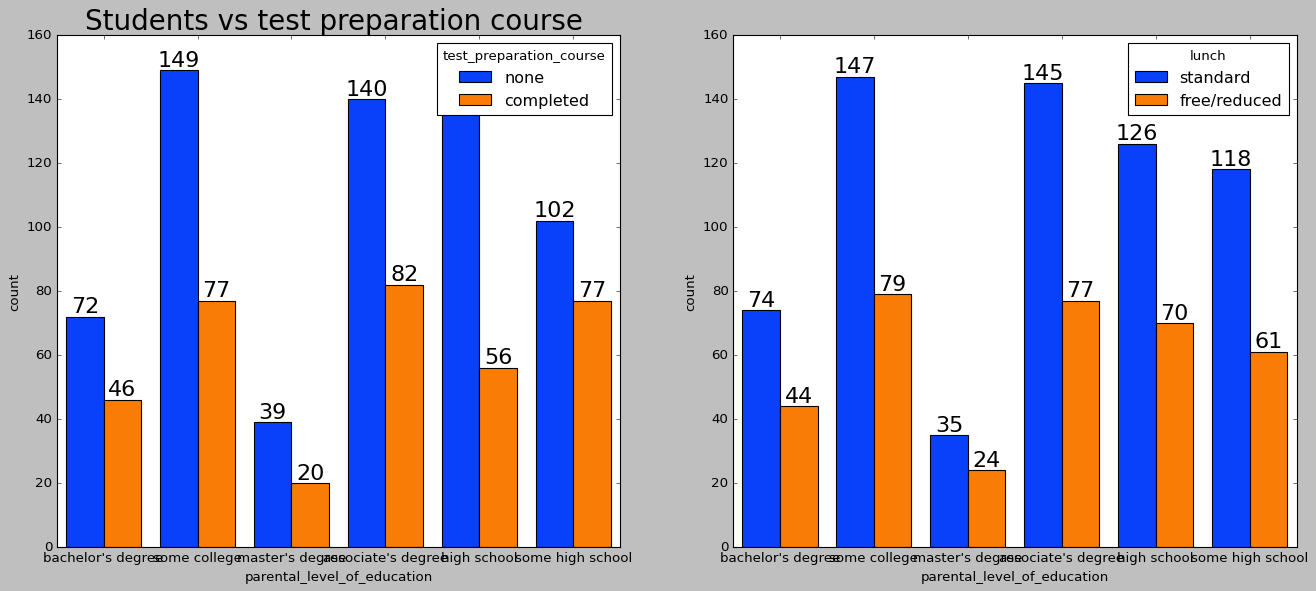

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing_score'>

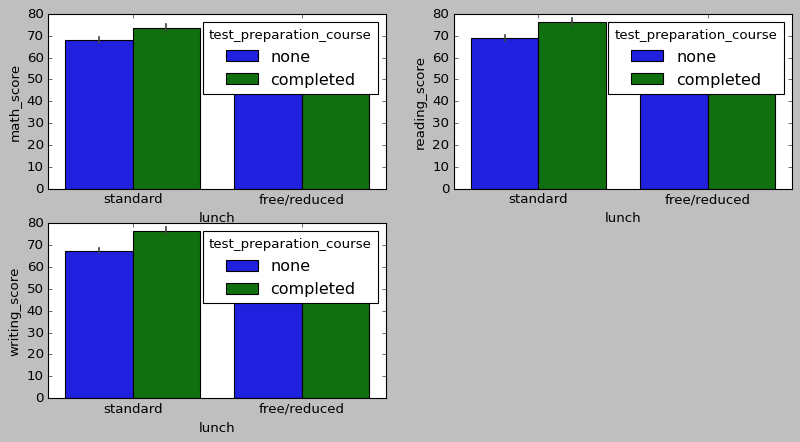

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

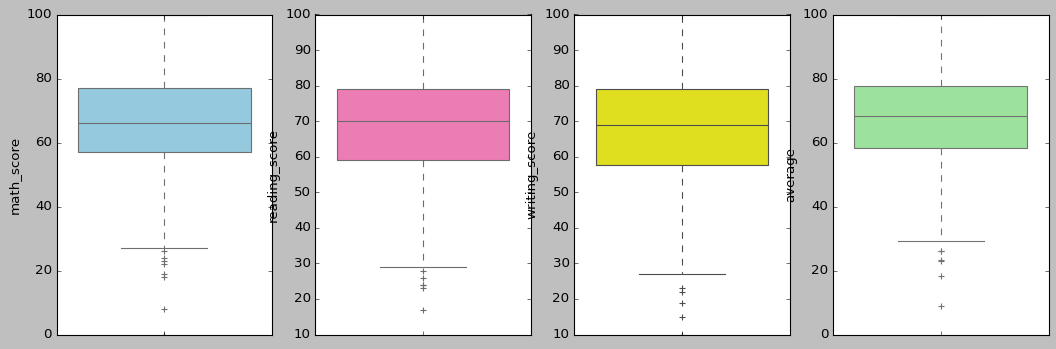

In [40]:
## checking outliers 
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

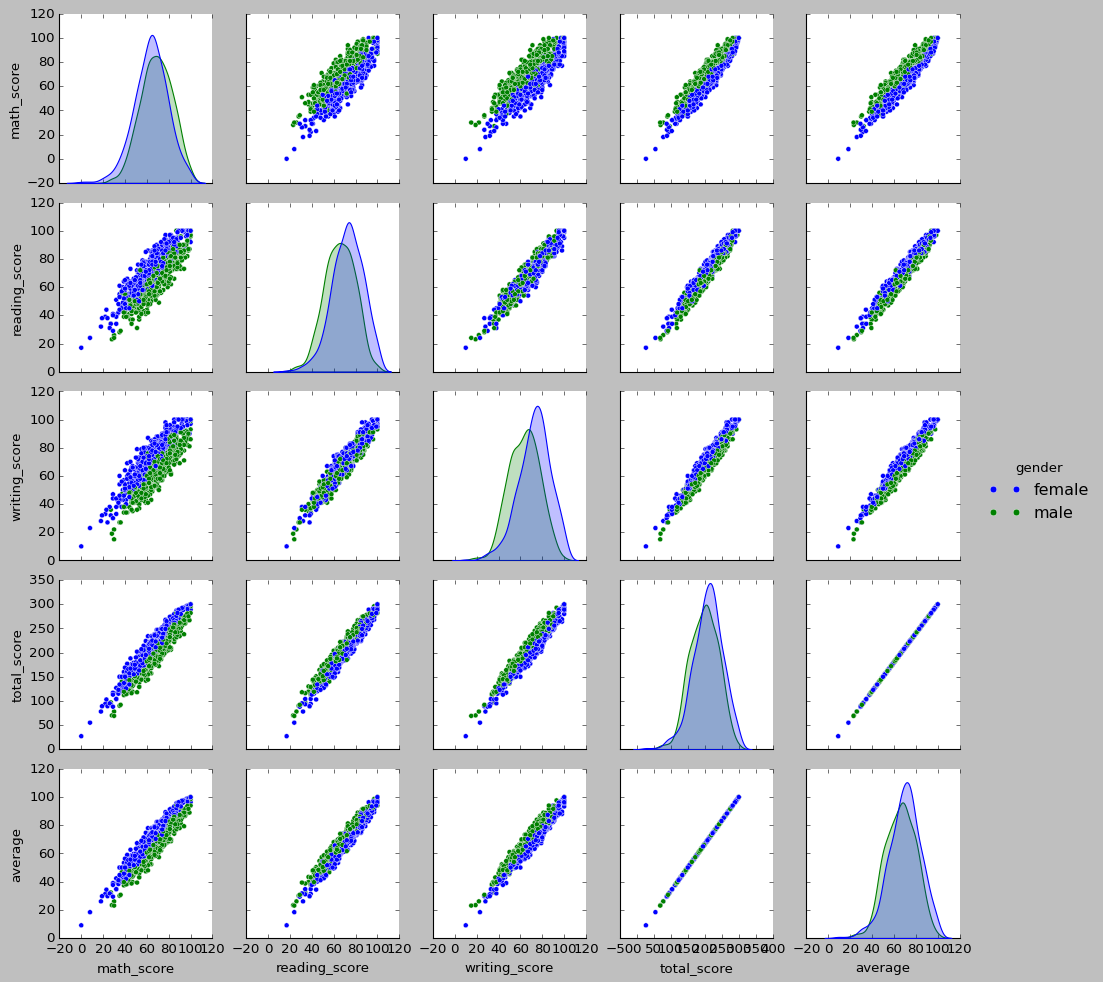

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.